In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
plt.ion()

In [2]:
datapath1 = "./run1/"
datapath2 = "./run2/"
models = ["fulllinearmodel_fit_table.csv","reducedlinearmodelNegBinom_fit_table.csv",
          "reducedlinearmodelq0_fit_table.csv","reducedlinearmodelq0ctime_fit_table.csv"]

model = models[3]
a = pd.read_csv(datapath1 + model)
b = pd.read_csv(datapath2 + model)


In [3]:
#get roi
rois = a.roi.unique()
#get inferred
theta = a.columns[2:] 
ntheta = len(theta)



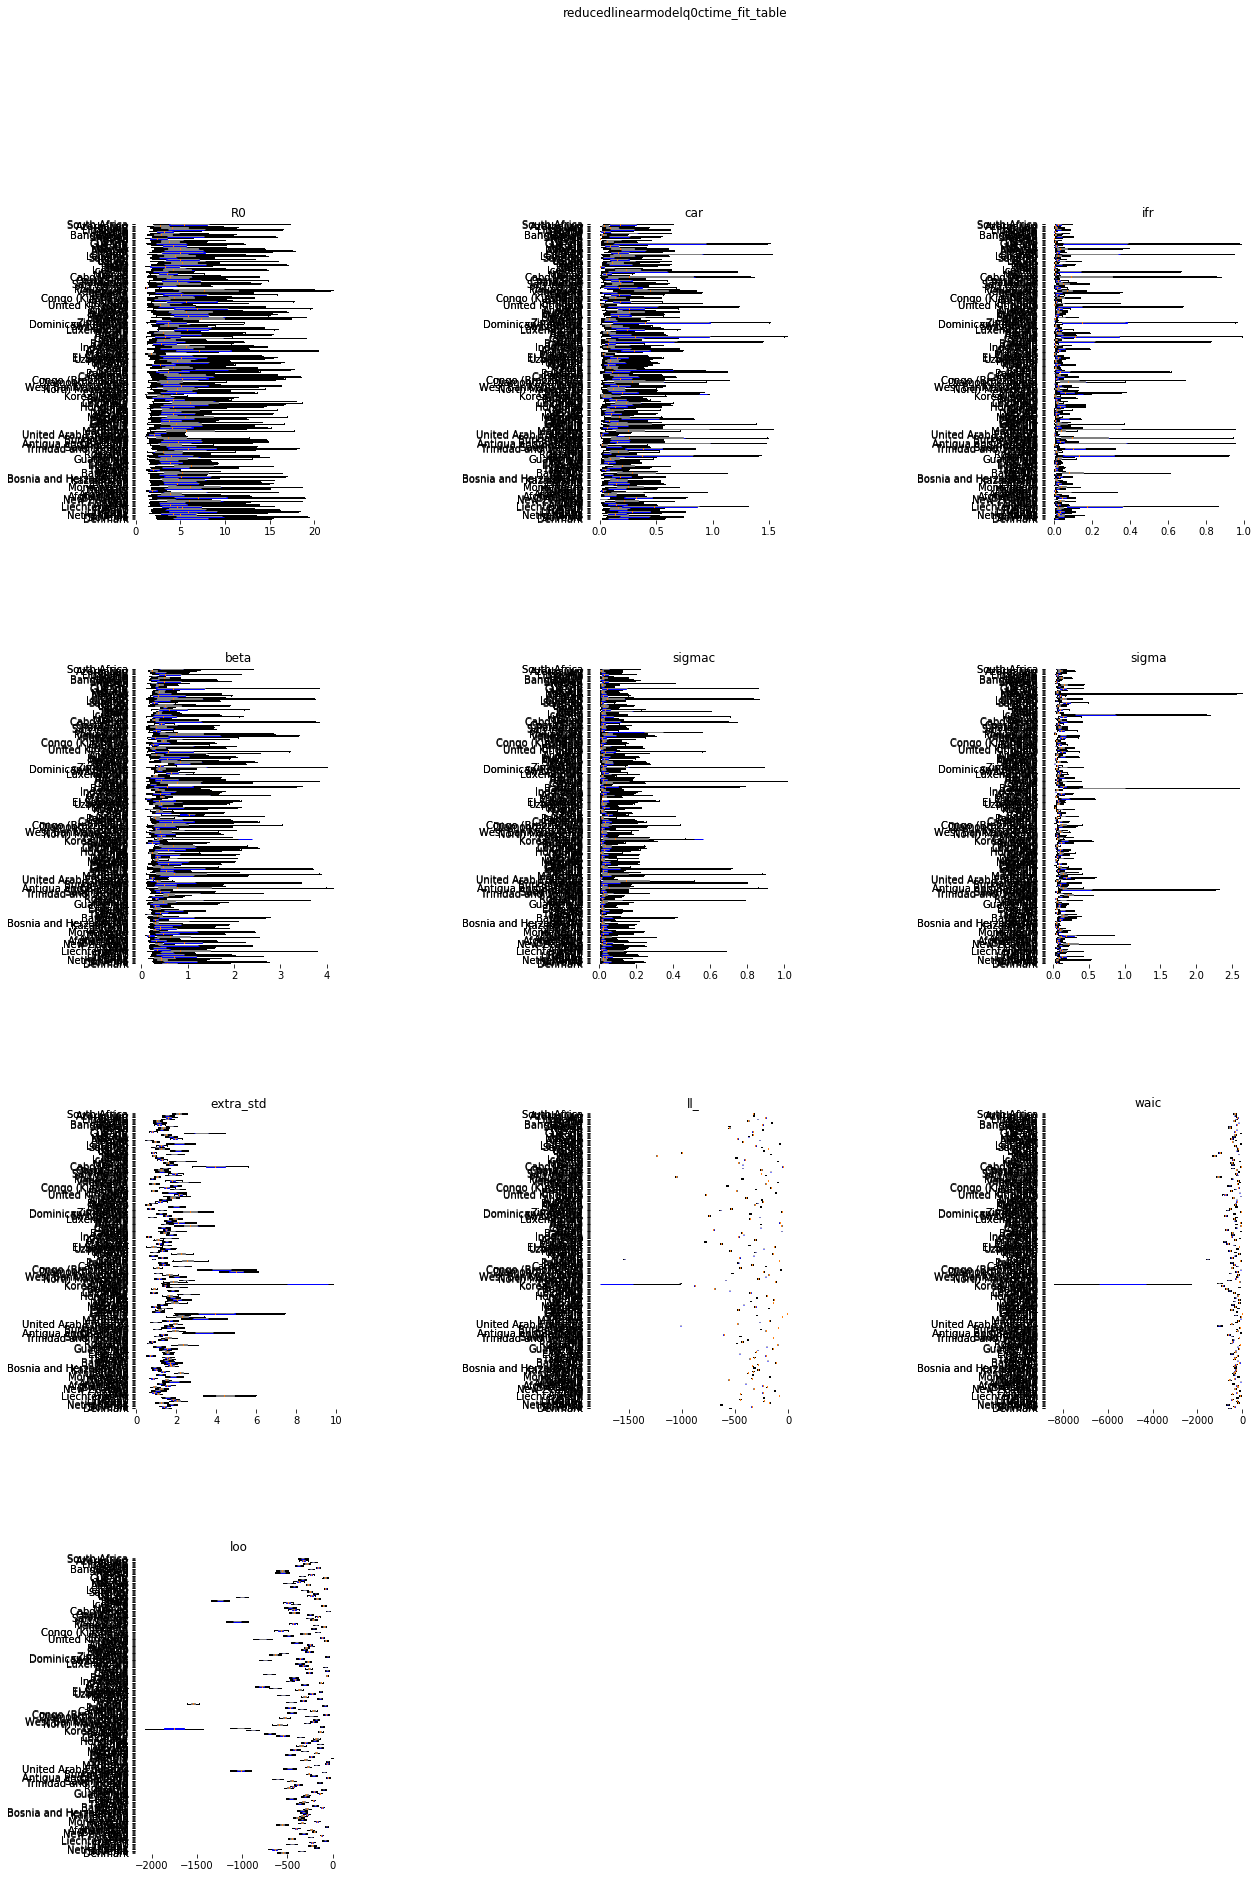

In [4]:
#plot side by side 

def simpleaxis(ax):
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    
import math
def plot_table_data(a,b,roi_subset):
    fig, axes = plt.subplots(math.ceil(ntheta/3), 3, figsize=(20, 30))
    for i, ax in enumerate(axes.flat):
        try:
            col = theta[i]
            for j, roi in enumerate(roi_subset):
                boxes1 = [
                    {
                    'x': i,
                    'label' : roi,
                    'whislo': a.loc[(a.roi==roi)&(a['quantile']==0.025), col].values[0],    # Bottom whisker position
                    'q1'    : a.loc[(a.roi==roi)&(a['quantile']==0.25), col].values[0],    # First quartile (25th percentile)
                    'med'   : a.loc[(a.roi==roi)&(a['quantile']==0.5), col].values[0],    # Median         (50th percentile)
                    'q3'    : a.loc[(a.roi==roi)&(a['quantile']==0.75), col].values[0],     # Third quartile (75th percentile)
                    'whishi': a.loc[(a.roi==roi)&(a['quantile']==0.975), col].values[0],    # Top whisker position
                    'fliers': []        # Outliers
                    }
                ]
                boxes2 = [
                    {
                    'x': i,
                    'label' : roi,
                    'whislo': b.loc[(b.roi==roi)&(b['quantile']==0.025), col].values[0],    # Bottom whisker position
                    'q1'    : b.loc[(b.roi==roi)&(b['quantile']==0.25), col].values[0],    # First quartile (25th percentile)
                    'med'   : b.loc[(b.roi==roi)&(b['quantile']==0.5), col].values[0],    # Median         (50th percentile)
                    'q3'    : b.loc[(b.roi==roi)&(b['quantile']==0.75), col].values[0],     # Third quartile (75th percentile)
                    'whishi': b.loc[(b.roi==roi)&(b['quantile']==0.975), col].values[0],    # Top whisker position
                    'fliers': []        # Outliers
                    }
                ]
                ax.bxp(boxes1, positions=[j], showfliers=False, vert=False, patch_artist=True,
                       boxprops=dict(facecolor='none',edgecolor='blue'))
                ax.bxp(boxes2, positions=[j+0.3], showfliers=False, vert=False, patch_artist=True,
                       boxprops=dict(facecolor='none',edgecolor='gray'))
            ax.set_title(theta[i])
            simpleaxis(ax)
        except:
            simpleaxis(ax)
            ax.xaxis.set_visible(False)
            ax.yaxis.set_visible(False)
# ind = np.arange(len(rois))
# np.random.shuffle(ind)
# roi_subset = rois[ind[:10]]
# roi_subset = ['Monaco','Italy','United Kingdom','Egypt','Algeria','US_NY','Switzerland','South Africa','US','US_NH','Sweden']
roi_subset = rois
plot_table_data(a,b, roi_subset)
plt.subplots_adjust(hspace=0.5,wspace=1.2)
plt.suptitle(model.split('.csv')[0])

plt.savefig("../postmodel_derivatives/"+model.split('.csv')[0]+'_sampleroi.png')
# print(roi_subset)